In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Global plotting defaults
plt.rcParams["figure.figsize"] = (10, 4)
plt.rcParams["axes.grid"] = True


In [102]:
fs = 1000  # Sampling frequency (Hz)

data = np.loadtxt(r"/Users/bijitbasumatary/Downloads/ECG DATA/Durgam Siddartha (1).txt")

print("Data shape:", data.shape)


Data shape: (829045, 4)


In [103]:
duration_sec = 2 # select first 2 second of data
samples = duration_sec * fs

data_2s = data[:samples, :]  #2x1000=2000


In [104]:
data_2s

array([[-0.0216675, -0.0834961,  1.05646  , -3.24964  ],
       [-0.0283813, -0.0823364,  1.05811  , -3.24964  ],
       [-0.0161743, -0.0811157,  1.05939  , -3.24964  ],
       ...,
       [-0.0827026, -0.0268555,  0.015564 , -3.24964  ],
       [-0.0906372, -0.0267944,  0.0404053, -3.24964  ],
       [-0.100708 , -0.0266724,  0.0651855, -3.24964  ]], shape=(2000, 4))

In [105]:
ecg  = data_2s[:, 0] # extract 2 second of each column and assign variable name
ppg1 = data_2s[:, 1]
ppg2 = data_2s[:, 2]
dyn  = data_2s[:, 3]

t = np.arange(len(ecg)) / fs   #Dividing by fs converts sample index to time in seconds


In [106]:
t

array([0.000e+00, 1.000e-03, 2.000e-03, ..., 1.997e+00, 1.998e+00,
       1.999e+00], shape=(2000,))

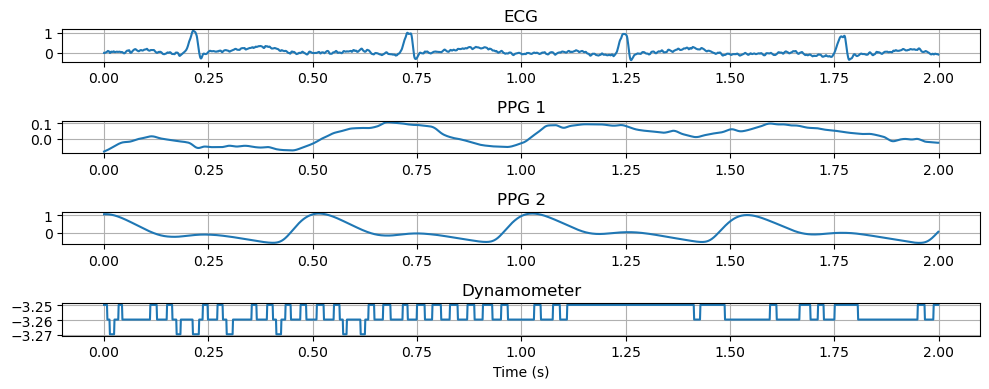

In [107]:
plt.subplot(4,1,1)
plt.plot(t, ecg)
plt.title("ECG")

plt.subplot(4,1,2)
plt.plot(t, ppg1)
plt.title("PPG 1")

plt.subplot(4,1,3)
plt.plot(t, ppg2)
plt.title("PPG 2")

plt.subplot(4,1,4)
plt.plot(t, dyn)
plt.title("Dynamometer")
plt.xlabel("Time (s)")

plt.tight_layout()
plt.show()


In [108]:
# -------- Notch Filter (50 Hz) -------- # design the filters
notch_freq = 50  # Hz
Q = 30

b_notch, a_notch = signal.iirnotch(notch_freq, Q, fs)

# -------- Low-Pass Filters --------
# ECG   # 4→ Filter order (4th order Butterworth filter)  #100 → Cut-off frequency in Hz, btype='low'-means Low-Pass Filter

b_lpf_ecg, a_lpf_ecg = signal.butter(
    4, 100/(fs/2), btype='low'
)

# PPG
b_lpf_ppg, a_lpf_ppg = signal.butter(
    4, 10/(fs/2), btype='low'
)

# Dynamometer
b_lpf_dyn, a_lpf_dyn = signal.butter(
    4, 20/(fs/2), btype='low'
)


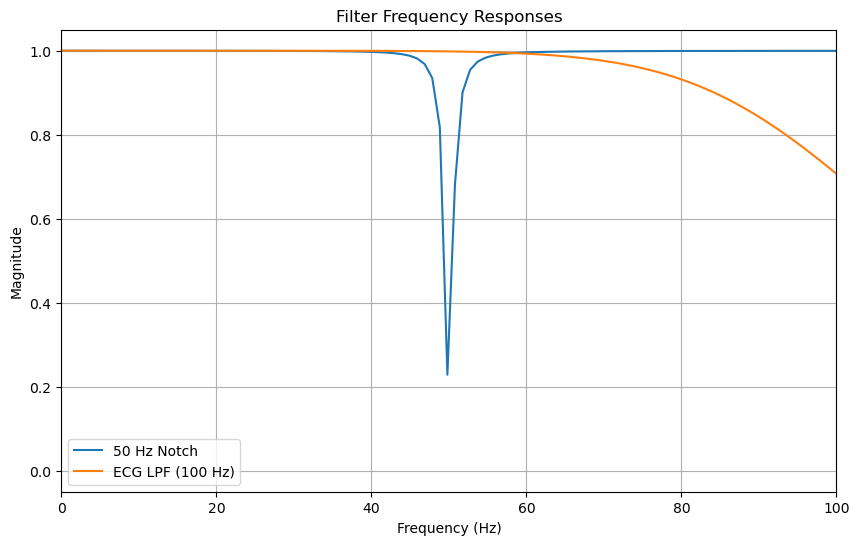

In [109]:
plt.figure(figsize=(10,6)) # observe frequency response

# Notch
w, h = signal.freqz(b_notch, a_notch, fs=fs)
plt.plot(w, abs(h), label="50 Hz Notch")

# ECG LPF
w, h = signal.freqz(b_lpf_ecg, a_lpf_ecg, fs=fs)
plt.plot(w, abs(h), label="ECG LPF (100 Hz)")

plt.xlim(0, 100)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Filter Frequency Responses")
plt.legend()
plt.show()


In [110]:
def apply_filters(x, b_notch, a_notch, b_lpf, a_lpf):      #This function takes signal x and applies two filters in sequence: Notch filter  and Low-pass filter
    x1 = signal.filtfilt(b_notch, a_notch, x)
    x2 = signal.filtfilt(b_lpf, a_lpf, x1)
    return x2


In [111]:
ecg_filt  = apply_filters(ecg,  b_notch, a_notch, b_lpf_ecg, a_lpf_ecg)   #here x= ecg,  b_lpf = b_lpf_ecg,   a_lpf= a_lpf_ecg 
ppg1_filt = apply_filters(ppg1, b_notch, a_notch, b_lpf_ppg, a_lpf_ppg)   #here x= ppg1
ppg2_filt = apply_filters(ppg2, b_notch, a_notch, b_lpf_ppg, a_lpf_ppg)
dyn_filt  = apply_filters(dyn,  b_notch, a_notch, b_lpf_dyn, a_lpf_dyn)


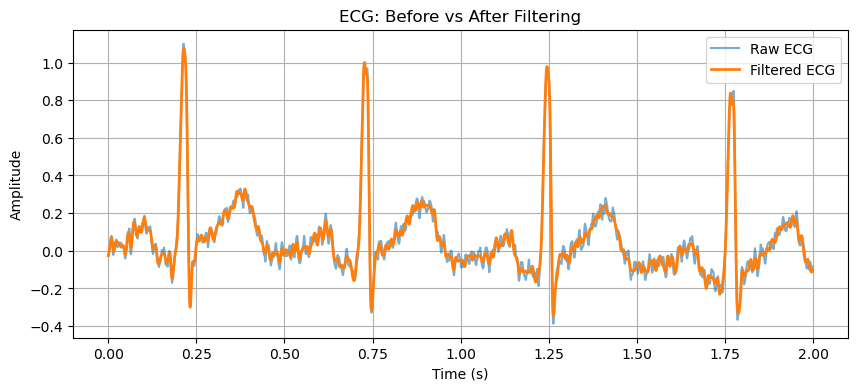

In [112]:
plt.plot(t, ecg, label="Raw ECG", alpha=0.6)
plt.plot(t, ecg_filt, label="Filtered ECG", linewidth=2)

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("ECG: Before vs After Filtering")
plt.legend()
plt.show()


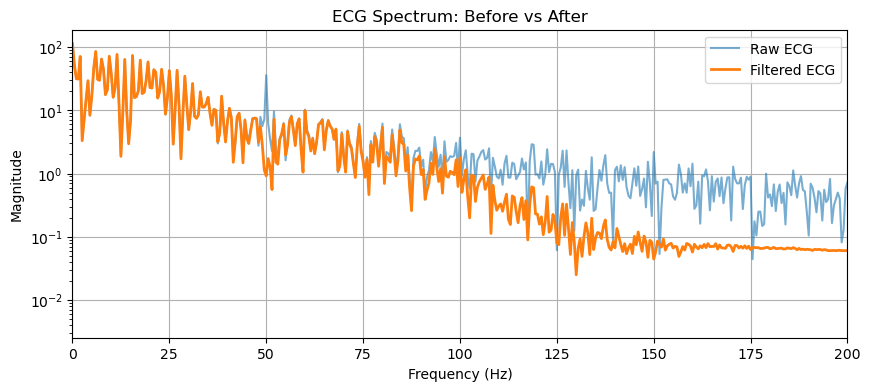

In [113]:
freqs = np.fft.rfftfreq(len(ecg), 1/fs)

fft_raw = np.abs(np.fft.rfft(ecg))
fft_filt = np.abs(np.fft.rfft(ecg_filt))

plt.semilogy(freqs, fft_raw, label="Raw ECG", alpha=0.6) # alpha controls the transparency , alpha = 0→transparent, 1→solid
plt.semilogy(freqs, fft_filt, label="Filtered ECG", linewidth=2)

plt.xlim(0, 200)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("ECG Spectrum: Before vs After")
plt.legend()
plt.show()


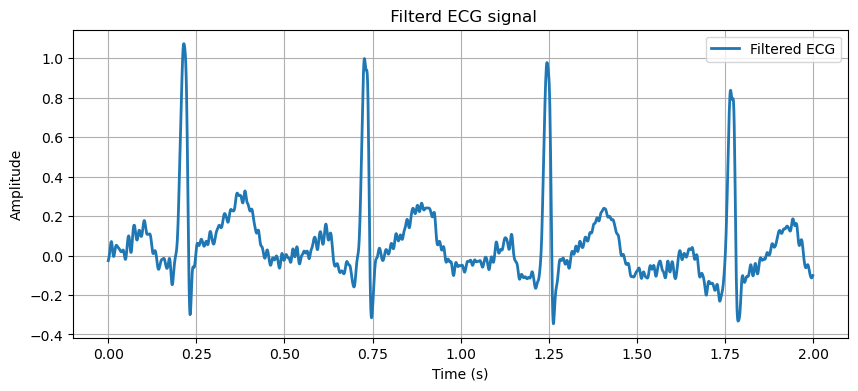

In [114]:
plt.plot(t, ecg_filt, label="Filtered ECG", linewidth=2)

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title(" Filterd ECG signal")
plt.legend()
plt.show()